In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# open as pandas dataframes
tf_df = pd.read_csv(r'E:/Git_repos/TF2_stats/TF2_stats.csv', na_values='NaN')

# change date column
tf_df['Date']= pd.to_datetime(tf_df['Date'])

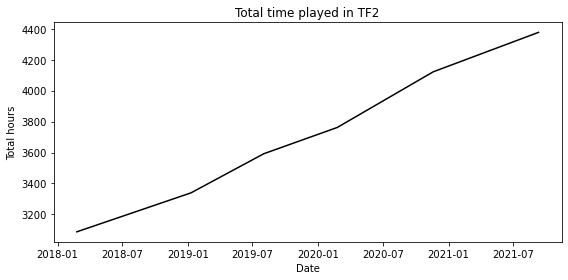

In [4]:
# figure setup
fig = plt.figure(figsize=(8, 4), tight_layout=True)
ax = fig.subplots(nrows=1, ncols=1)

# plot data
ax.plot(tf_df['Date'], tf_df['Hours'], c='k')

# labels
ax.set_xlabel('Date')
ax.set_ylabel('Total hours')
ax.set_title('Total time played in TF2')

# save and show
plt.savefig(r'E:/Git_repos/TF2_stats/Figures/Total_hours.png', dpi=300, facecolor='white', transparent=False)
plt.show()

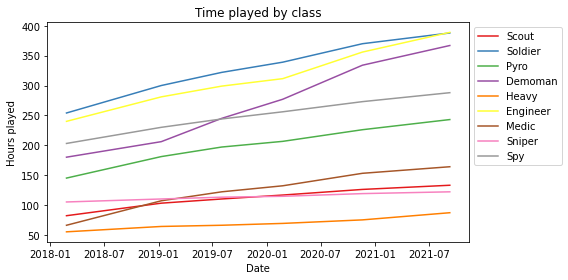

In [5]:
# figure setup
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set1.colors)
fig = plt.figure(figsize=(8, 4), tight_layout=True)
ax = fig.subplots(nrows=1, ncols=1)

# plot data
ax.plot(tf_df['Date'], tf_df['Scout_hours'], label='Scout')
ax.plot(tf_df['Date'], tf_df['Soldier_hours'], label='Soldier')
ax.plot(tf_df['Date'], tf_df['Pyro_hours'], label='Pyro')
ax.plot(tf_df['Date'], tf_df['Demoman_hours'], label='Demoman')
ax.plot(tf_df['Date'], tf_df['Heavy_hours'], label='Heavy')
ax.plot(tf_df['Date'], tf_df['Engineer_hours'], label='Engineer')
ax.plot(tf_df['Date'], tf_df['Medic_hours'], label='Medic')
ax.plot(tf_df['Date'], tf_df['Sniper_hours'], label='Sniper')
ax.plot(tf_df['Date'], tf_df['Spy_hours'], label='Spy')

# labels
ax.set_xlabel('Date')
ax.set_ylabel('Hours played')
ax.set_title('Time played by class')
ax.legend(bbox_to_anchor = (1, 1))

# save and show
plt.savefig(r'E:/Git_repos/TF2_stats/Figures/Class_hours.png', dpi=300, facecolor='white', transparent=False)
plt.show()

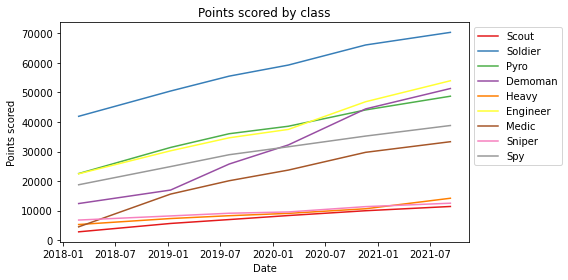

In [6]:
# figure setup
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set1.colors)
fig = plt.figure(figsize=(8, 4), tight_layout=True)
ax = fig.subplots(nrows=1, ncols=1)

# plot data
ax.plot(tf_df['Date'], tf_df['Scout_cosmetic'], label='Scout')
ax.plot(tf_df['Date'], tf_df['Soldier_cosmetic'], label='Soldier')
ax.plot(tf_df['Date'], tf_df['Pyro_cosmetic'], label='Pyro')
ax.plot(tf_df['Date'], tf_df['Demoman_cosmetic'], label='Demoman')
ax.plot(tf_df['Date'], tf_df['Heavy_cosmetic'], label='Heavy')
ax.plot(tf_df['Date'], tf_df['Engineer_cosmetic'], label='Engineer')
ax.plot(tf_df['Date'], tf_df['Medic_cosmetic'], label='Medic')
ax.plot(tf_df['Date'], tf_df['Sniper_cosmetic'], label='Sniper')
ax.plot(tf_df['Date'], tf_df['Spy_cosmetic'], label='Spy')

# labels
ax.set_xlabel('Date')
ax.set_ylabel('Points scored')
ax.set_title('Points scored by class')
# ax.set_yscale('log')
ax.legend(bbox_to_anchor = (1, 1))

# save and show
plt.savefig(r'E:/Git_repos/TF2_stats/Figures/Class_points.png', dpi=300, facecolor='white', transparent=False)
plt.show()

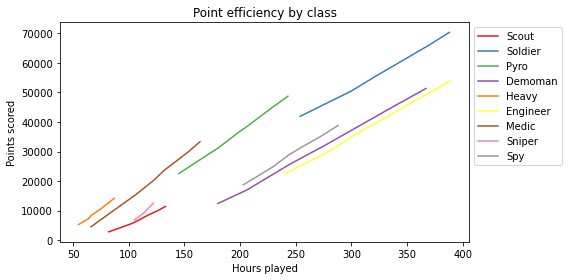

In [7]:
# figure setup
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set1.colors)
fig = plt.figure(figsize=(8, 4), tight_layout=True)
ax = fig.subplots(nrows=1, ncols=1)

# plot data
ax.plot(tf_df['Scout_hours'], tf_df['Scout_cosmetic'], label='Scout')
ax.plot(tf_df['Soldier_hours'], tf_df['Soldier_cosmetic'], label='Soldier')
ax.plot(tf_df['Pyro_hours'], tf_df['Pyro_cosmetic'], label='Pyro')
ax.plot(tf_df['Demoman_hours'], tf_df['Demoman_cosmetic'], label='Demoman')
ax.plot(tf_df['Heavy_hours'], tf_df['Heavy_cosmetic'], label='Heavy')
ax.plot(tf_df['Engineer_hours'], tf_df['Engineer_cosmetic'], label='Engineer')
ax.plot(tf_df['Medic_hours'], tf_df['Medic_cosmetic'], label='Medic')
ax.plot(tf_df['Sniper_hours'], tf_df['Sniper_cosmetic'], label='Sniper')
ax.plot(tf_df['Spy_hours'], tf_df['Spy_cosmetic'], label='Spy')

# labels
ax.set_xlabel('Hours played')
ax.set_ylabel('Points scored')
ax.set_title('Point efficiency by class')
ax.legend(bbox_to_anchor = (1, 1))

# save and show
plt.savefig(r'E:/Git_repos/TF2_stats/Figures/Hours_points.png', dpi=300, facecolor='white', transparent=False)
plt.show()

In [8]:
# get lists of each class's weapons
scout_weapon_list = list(tf_df.columns)[4:7]
soldier_weapon_list = list(tf_df.columns)[9:18]
pyro_weapon_list = list(tf_df.columns)[20:29]
demoman_weapon_list = list(tf_df.columns)[31:39]
heavy_weapon_list = list(tf_df.columns)[41:46]
engineer_weapon_list = list(tf_df.columns)[48:52]
medic_weapon_list = list(tf_df.columns)[54:59]
sniper_weapon_list = list(tf_df.columns)[61:65]
spy_weapon_list = list(tf_df.columns)[67:]

In [9]:
# remove 1-date weapons
soldier_weapon_list.remove('Soldier_panic-attack')
pyro_weapon_list.remove('Pyro_panic-attack')
heavy_weapon_list.remove('Heavy_panic-attack')
engineer_weapon_list.remove('Engineer_panic-attack')

In [10]:
def plot_weapons_date(class_name, weapon_list):
    
    # figure setup
    plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)
    fig = plt.figure(figsize=(8, 4), tight_layout=True)
    ax = fig.subplots(nrows=1, ncols=1)
    
    # plot each weapon
    for weapon in weapon_list:
        ax.plot(tf_df['Date'], 
                tf_df[weapon], 
                label=weapon[len(class_name)+1:])
        
    # labels
    ax.set_xlabel('Date')
    ax.set_ylabel('log(Kills/Points)')
    ax.set_title('Stranges: {}'.format(class_name))
#     ax.set_yscale('log')
    ax.legend(bbox_to_anchor = (1, 1))

    # save and show
    plt.savefig(r'E:/Git_repos/TF2_stats/Figures/Stranges_by_date-{}.png'.format(class_name), 
                dpi=300, 
                facecolor='white', 
                transparent=False)
    plt.show()

In [11]:
def plot_weapons_hours(class_name, weapon_list):
    
    # figure setup
    plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)
    fig = plt.figure(figsize=(8, 4), tight_layout=True)
    ax = fig.subplots(nrows=1, ncols=1)
    
    # plot each weapon
    for weapon in weapon_list:
        ax.plot(tf_df[class_name + '_hours'], 
                tf_df[weapon], 
                label=weapon[len(class_name)+1:])
        
    # labels
    ax.set_xlabel('Hours played as ' + class_name)
    ax.set_ylabel('log(Kills/Points)')
    ax.set_title('Stranges: {}'.format(class_name))
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor = (1, 1))

    # save and show
    plt.savefig(r'E:/Git_repos/TF2_stats/Figures/Stranges_by_hours-{}.png'.format(class_name), 
                dpi=300, 
                facecolor='white', 
                transparent=False)
    plt.show()

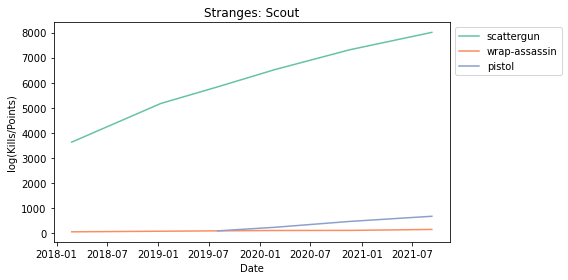

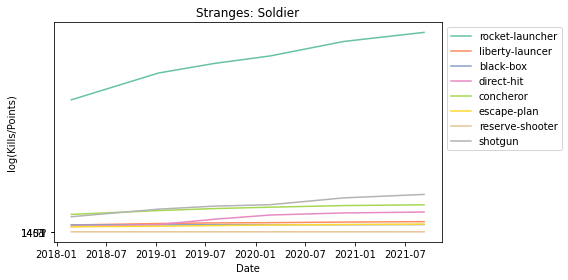

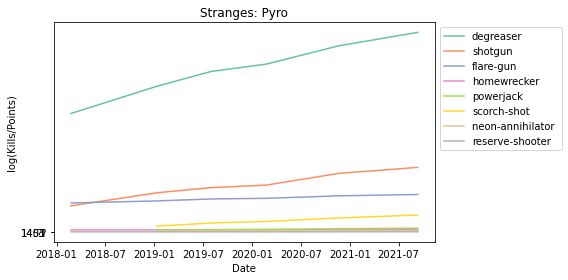

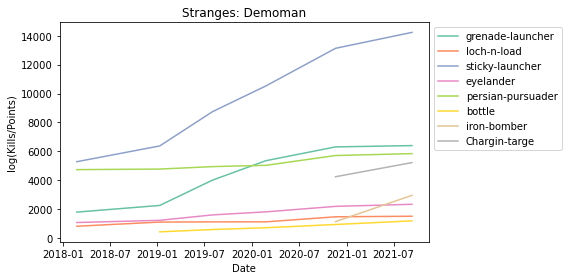

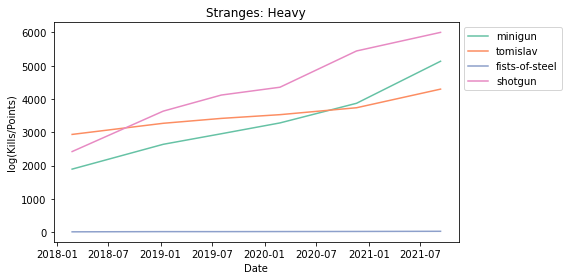

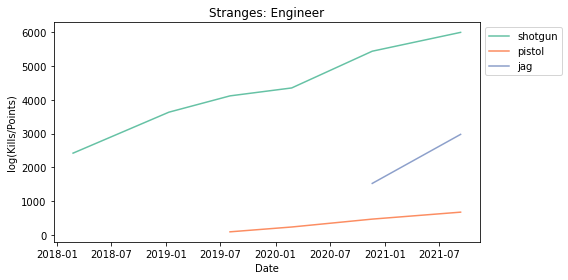

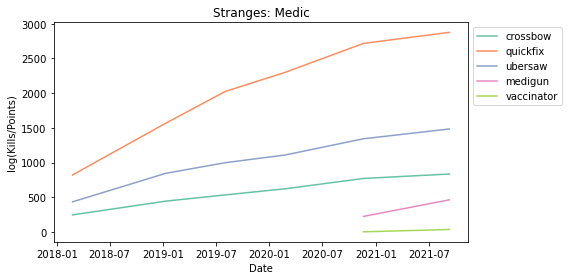

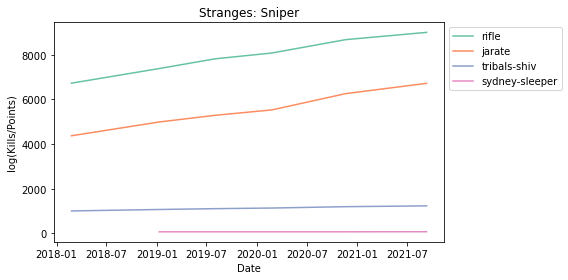

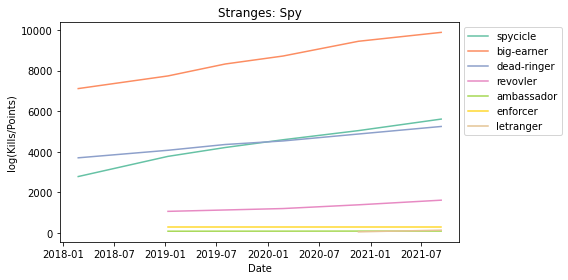

In [12]:
# generate plots for every class
plot_weapons_date('Scout', scout_weapon_list)
plot_weapons_date('Soldier', soldier_weapon_list)
plot_weapons_date('Pyro', pyro_weapon_list)
plot_weapons_date('Demoman', demoman_weapon_list)
plot_weapons_date('Heavy', heavy_weapon_list)
plot_weapons_date('Engineer', engineer_weapon_list)
plot_weapons_date('Medic', medic_weapon_list)
plot_weapons_date('Sniper', sniper_weapon_list)
plot_weapons_date('Spy', spy_weapon_list)

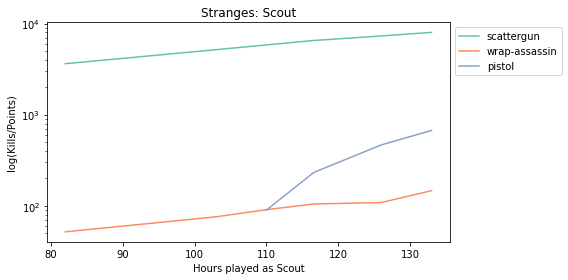

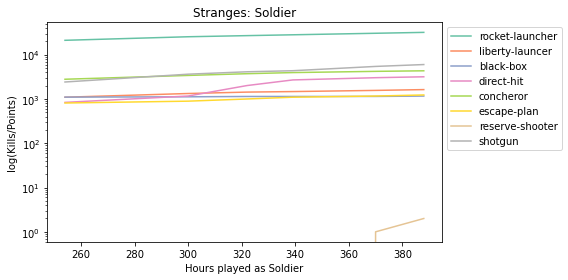

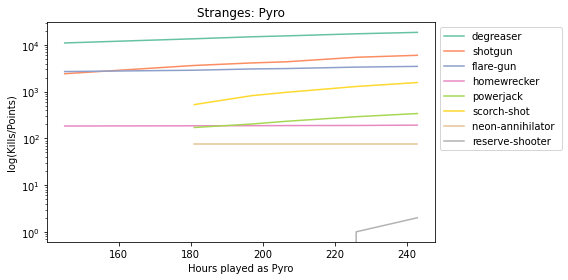

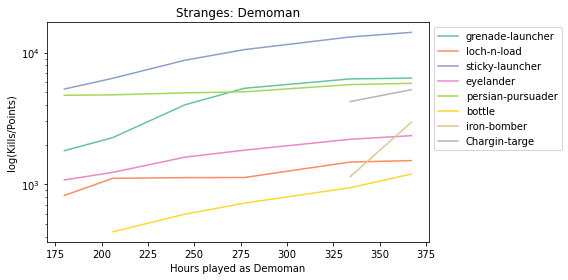

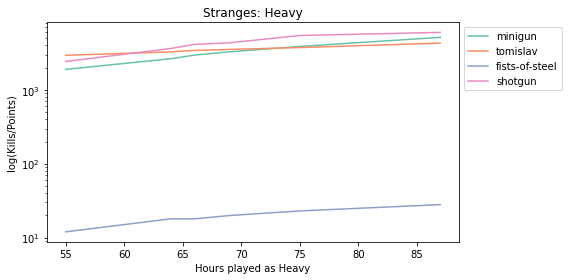

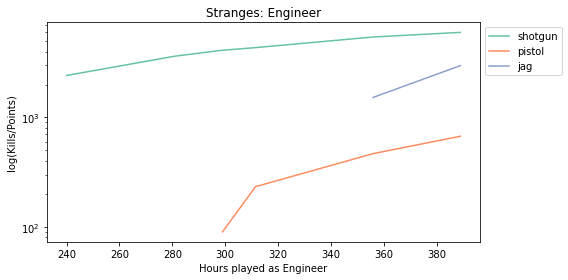

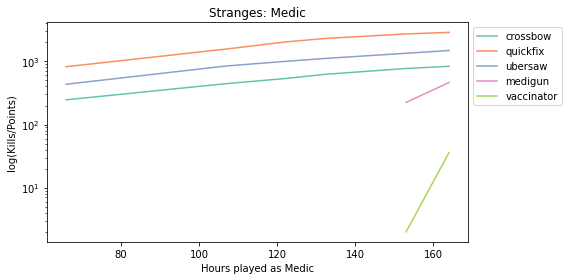

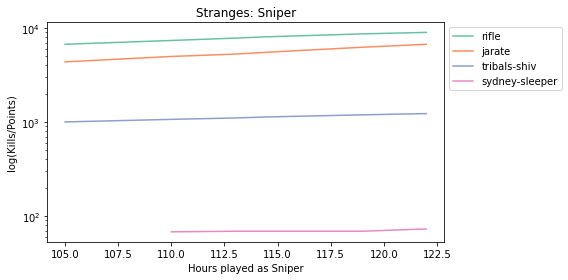

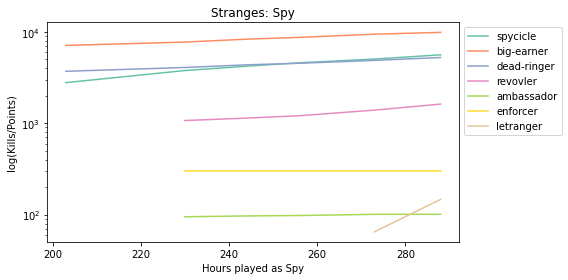

In [13]:
# generate plots for every class
plot_weapons_hours('Scout', scout_weapon_list)
plot_weapons_hours('Soldier', soldier_weapon_list)
plot_weapons_hours('Pyro', pyro_weapon_list)
plot_weapons_hours('Demoman', demoman_weapon_list)
plot_weapons_hours('Heavy', heavy_weapon_list)
plot_weapons_hours('Engineer', engineer_weapon_list)
plot_weapons_hours('Medic', medic_weapon_list)
plot_weapons_hours('Sniper', sniper_weapon_list)
plot_weapons_hours('Spy', spy_weapon_list)